In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [8]:
# Path ke direktori data di Google Drive
train_dir = '/content/drive/MyDrive/dataset/train'
validation_dir = '/content/drive/MyDrive/dataset/validate'

In [9]:
num_classes = 6
image_size = (299, 299)
batch_size = 32
learning_rate = 0.001
epochs = 5

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [11]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

87910968/87910968 [==============================] - 1s 0us/step


In [13]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [14]:
model = Model(inputs=base_model.input, outputs=predictions)

In [15]:
for layer in base_model.layers:
  layer.trainable = False

In [16]:
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 252 images belonging to 6 classes.
Found 54 images belonging to 6 classes.


In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // batch_size
)

Epoch 1/20
7/7 [==============================] - 115s 15s/step - loss: 0.9024 - accuracy: 0.6920 - val_loss: 0.2332 - val_accuracy: 0.8750
Epoch 2/20
7/7 [==============================] - 70s 10s/step - loss: 0.0658 - accuracy: 0.9682 - val_loss: 0.5248 - val_accuracy: 0.9375
Epoch 3/20
7/7 [==============================] - 76s 10s/step - loss: 0.0397 - accuracy: 0.9727 - val_loss: 0.4338 - val_accuracy: 0.9375
Epoch 4/20
7/7 [==============================] - 71s 10s/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.4793 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 69s 10s/step - loss: 0.0107 - accuracy: 0.9955 - val_loss: 0.2286 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 70s 10s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 70s 10s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1966 - val_accuracy: 0.9688
Epoch 8/20
7/7 [==========

In [19]:
def trainGraph(hist,labelType):
  fig = plt.figure()
  plt.plot(hist.history[labelType], color = 'teal', label = labelType)
  plt.plot(hist.history['val_'+labelType] , color = 'orange', label = 'val_'+labelType)
  fig.suptitle(labelType, fontsize=20)
  plt.legend(loc = 'upper left')
  plt.show()

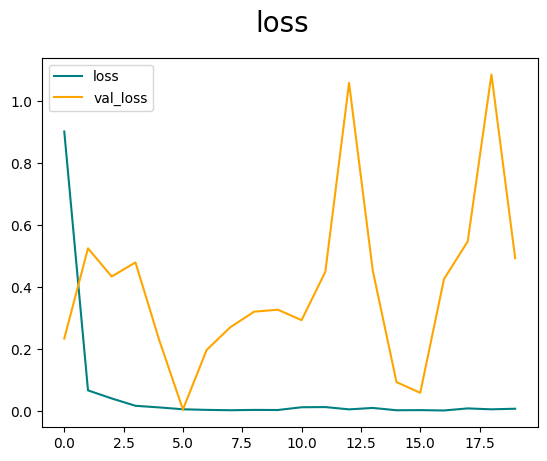

In [21]:
trainGraph(history,'loss')

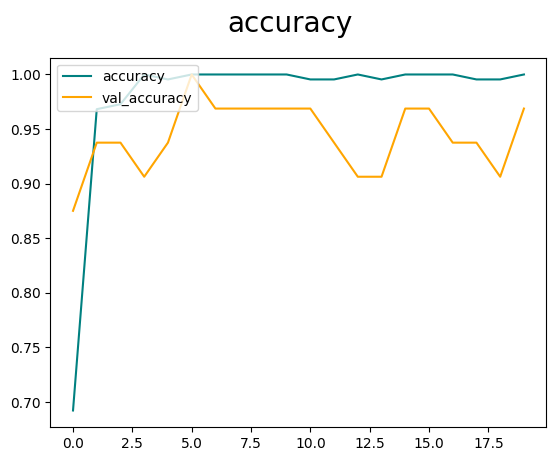

In [22]:
trainGraph(history,'accuracy')

In [30]:
# Optional for model saving
def saveModel(versi, model):
    filepath = "drive/MyDrive/data skripsi/model_" + versi + ".h5"
    model.save(filepath)

In [31]:
#optional for model saving
saveModel("20", model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test Model

Saving 090234b385.jpg to 090234b385.jpg


1/1 [==============================] - 2s 2s/step


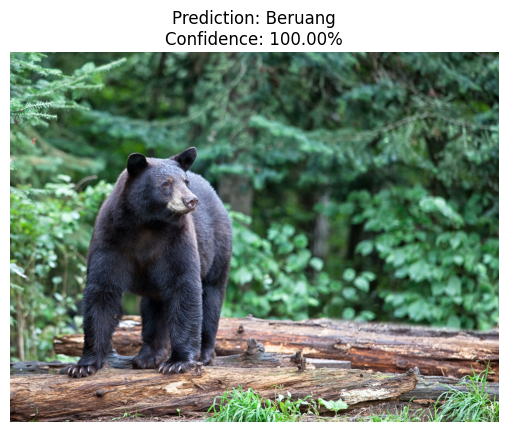

In [40]:
import PIL.Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('/content/drive/MyDrive/data skripsi/model_20.h5')


class_labels = ['Anjing Laut', 'Babi Hutan', 'Badak', 'Beruang', 'Burung Enggang', 'Bison',]


def preprocess_image(image_path):
    img = PIL.Image.open(image_path)
    img = img.resize((299, 299))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img


def predict_animal(image_path):
    processed_image = preprocess_image(image_path)
    predictions = model.predict(processed_image)
    predicted_label = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions)
    return predicted_label, confidence


from google.colab import files
uploaded = files.upload()


uploaded_file_path = list(uploaded.keys())[0]


prediction, confidence = predict_animal(uploaded_file_path)


img = PIL.Image.open(uploaded_file_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Prediction: {prediction}\nConfidence: {confidence:.2%}')
plt.show()